In [2]:
# dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# open website and parse its html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
mars_temp_soup = soup(html, 'html.parser')

In [5]:
# scrape data w/ splinter and bs4
mars_temps = []

data_pts = mars_temp_soup.find_all("tr", class_="data-row")
for data_pt in data_pts:
    row = []
    for metric in data_pt:
        if metric.text != '\n':
            row.append(metric.text)
    mars_temps.append(row)

mars_temps

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [6]:
# express scraped data as a dataframe
mars_temps_df = pd.DataFrame(mars_temps)
mars_temps_df.columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_temps_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
# assign apt datatypes to data
mars_temps_df[["id", "sol", "ls", "month", 'min_temp', 'pressure']] = mars_temps_df[["id", "sol", "ls", "month", 'min_temp', 'pressure']].apply(pd.to_numeric)
mars_temps_df["terrestrial_date"] = pd.to_datetime(mars_temps_df["terrestrial_date"])
mars_temps_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
# How many months exist on Mars?
mars_temps_df["month"].max()

12

In [9]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_temps_df["sol"].max()

1977

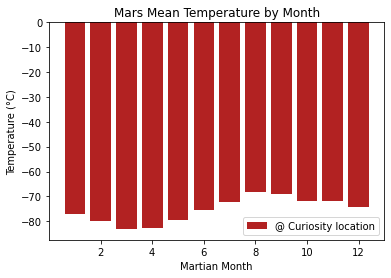

In [11]:
# What are the coldest and the warmest months on Mars?
mars_temps_by_month = mars_temps_df.groupby("month").mean()

# graph results
x_axis = mars_temps_by_month.index
y_axis = mars_temps_by_month["min_temp"]

plt.figure(facecolor="white")

plt.bar(x_axis, y_axis, color="firebrick", label="@ Curiosity location")

plt.title("Mars Mean Temperature by Month")
plt.xlabel("Martian Month")
plt.ylabel("Temperature (°C)")

plt.legend()

plt.savefig("resources/mean_temp.png")

plt.show()

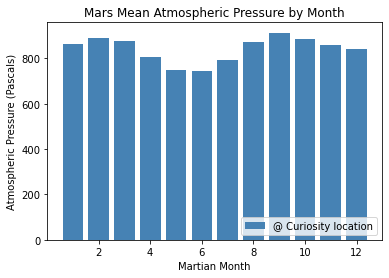

In [12]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
mars_temps_by_month = mars_temps_df.groupby("month").mean()

# graph results
x_axis = mars_temps_by_month.index
y_axis = mars_temps_by_month["pressure"]

plt.figure(facecolor="white")

plt.bar(x_axis, y_axis, color="steelblue", label="@ Curiosity location")

plt.title("Mars Mean Atmospheric Pressure by Month")
plt.xlabel("Martian Month")
plt.ylabel("Atmospheric Pressure (Pascals)")

plt.legend(loc="lower right")

plt.savefig("resources/mean_pressure.png")

plt.show()

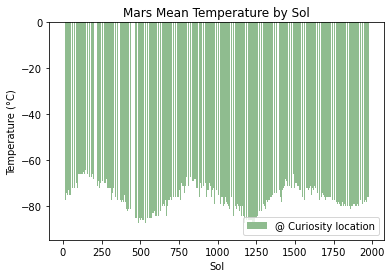

In [13]:
# About how many terrestrial (Earth) days exist in a Martian year?
x_axis = mars_temps_df["sol"]
y_axis = mars_temps_df["min_temp"]

plt.figure(facecolor="white")

plt.bar(x_axis, y_axis, color="darkseagreen", label="@ Curiosity location")

plt.title("Mars Mean Temperature by Sol")
plt.xlabel("Sol")
plt.ylabel("Temperature (°C)")

plt.legend()

plt.savefig("resources/mean_temp_by_sol.png")

plt.show()


In [120]:
# export data as csv
mars_temps_df.to_csv("mars_temp_data.csv", encoding='utf-8', index=False)

In [122]:
browser.quit()